# Assignment – 771762 Big Data and Data Mining PROJECT

In this task, we take 2019 road casualty information provided by the UK government and attempt to analyze so as to provide recommendations to improve safety and to develop machine learning models to predict accidents

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data sets
accidents = pd.read_csv('Road Safety Data - Accidents 2019.csv')
casualties = pd.read_csv('Road Safety Data - Casualties 2019.csv')
vehicles = pd.read_csv('Road Safety Data- Vehicles 2019.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Inspect the data sets

In [3]:
#view shape of each dataset
print('Accidents: ', accidents.shape)
print('Casualties: ', casualties.shape)
print('Vehicles: ', vehicles.shape)

Accidents:  (117536, 32)
Casualties:  (153158, 16)
Vehicles:  (216381, 23)


In [4]:
accidents.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117


In [5]:
casualties.head(2)

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5


In [6]:
vehicles.head(2)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2


There's a unique identifier 'Accident_Index' in all 3 datasets.

Let's combined all 3 and continue analysis

In [7]:
merged = pd.merge(accidents,vehicles, on='Accident_Index')
merged = merged.merge(casualties,on='Accident_Index')

In [8]:
print(merged.shape)
merged.head(2)

(210440, 69)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,9,3,0,0,0,0,0,9,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,-1,3,0,0,1,0,0,9,1,5


In [9]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210440 entries, 0 to 210439
Data columns (total 69 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               210440 non-null  object 
 1   Location_Easting_OSGR                        210360 non-null  float64
 2   Location_Northing_OSGR                       210360 non-null  float64
 3   Longitude                                    210360 non-null  float64
 4   Latitude                                     210360 non-null  float64
 5   Police_Force                                 210440 non-null  int64  
 6   Accident_Severity                            210440 non-null  int64  
 7   Number_of_Vehicles                           210440 non-null  int64  
 8   Number_of_Casualties                         210440 non-null  int64  
 9   Date                                         210440 non-nul

In [10]:
#load variables
variables = pd.read_excel('variable lookup.xls', sheet_name=None)

In [11]:
#variables returns a dictionary
#let's check the page titles of each sheet in the schedule
variables.keys()

dict_keys(['Introduction', 'Export Variables', 'Police Force', 'Accident Severity', 'Day of Week', 'Local Authority (District)', 'Local Authority (Highway)', '1st Road Class', 'Road Type', 'Speed Limit', 'Junction Detail', 'Junction Control', '2nd Road Class', 'Ped Cross - Human', 'Ped Cross - Physical', 'Light Conditions', 'Weather', 'Road Surface', 'Special Conditions at Site', 'Carriageway Hazards', 'Urban Rural', 'Police Officer Attend', 'Vehicle Type', 'Towing and Articulation', 'Vehicle Manoeuvre', 'Vehicle Location', 'Junction Location', 'Skidding and Overturning', 'Hit Object in Carriageway', 'Veh Leaving Carriageway', 'Hit Object Off Carriageway', '1st Point of Impact', 'Was Vehicle Left Hand Drive', 'Journey Purpose', 'Sex of Driver', 'Age Band', 'Vehicle Propulsion Code', 'Casualty Class', 'Sex of Casualty', 'Age of Casualty', 'Casualty Severity', 'Ped Location', 'Ped Movement', 'Car Passenger', 'Bus Passenger', 'Ped Road Maintenance Worker', 'Casualty Type', 'IMD Decile', '

## Data Analysis

We take a deeper look at the dataframe

In [12]:
variables['Accident Severity']

,code,label
0,1,Fatal
1,2,Serious
2,3,Slight


In [13]:
#visualize accident severity
merged.Accident_Severity.map({1:'Fatal',2:'Serious',3:'Slight'}).value_counts(normalize=True)

Slight     0.772325
Serious    0.206087
Fatal      0.021588
Name: Accident_Severity, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Accident Severity Distribution')

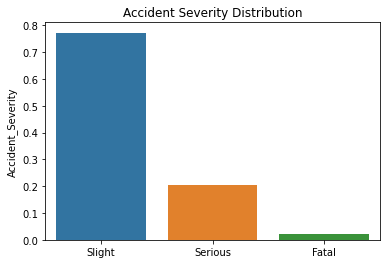

In [14]:
a_s = merged.Accident_Severity.map({1:'Fatal',2:'Serious',3:'Slight'}).value_counts(normalize=True)

sns.barplot(a_s.index, a_s)
plt.title('Accident Severity Distribution')

### (a)	Are there significant hours of the day, and days of the week, on which accidents occur?

In [15]:
variables['Day of Week']

,code,label
0,1,Sunday
1,2,Monday
2,3,Tuesday
3,4,Wednesday
4,5,Thursday
5,6,Friday
6,7,Saturday


In [16]:
#get dictionary for mapping
day_of_week = variables['Day of Week'].set_index('code').to_dict()['label']
day_of_week

{1: 'Sunday',
 2: 'Monday',
 3: 'Tuesday',
 4: 'Wednesday',
 5: 'Thursday',
 6: 'Friday',
 7: 'Saturday'}

In [17]:
#change Date column datatype to datetime format
merged.Date = pd.to_datetime(merged.Date)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


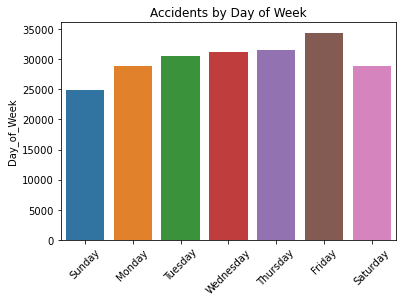

In [18]:
#count accidents by day of week
merged.Day_of_Week.map(day_of_week).value_counts(normalize=True)

#visualize accidents by day of week
fig, ax = plt.subplots(1,1)
dow = merged.Day_of_Week.value_counts().sort_index()
sns.barplot(dow.index,dow, ax=ax)

plt.title('Accidents by Day of Week')
ax.set_xticklabels(day_of_week.values())
plt.xticks(rotation=45)
plt.show()

16% of accidents happen on Fridays. This is the highest number.

Sundays have the least number of accidents with 11%.

In [19]:
#extract hour from time column
merged['Hour'] = pd.to_datetime(merged.Time).dt.hour

In [20]:
#count of accidents by hour
merged.Hour.value_counts()

17.0    19064
16.0    17384
15.0    16345
18.0    14668
14.0    13422
8.0     13250
13.0    13037
12.0    12512
19.0    11140
11.0    10947
10.0     9471
9.0      9261
7.0      9089
20.0     8045
21.0     6781
22.0     6058
23.0     4269
6.0      3918
0.0      3395
1.0      2171
5.0      1904
2.0      1591
4.0      1329
3.0      1276
Name: Hour, dtype: int64

Most accidents happen between closing hours from around 3pm to 7pm.


In [21]:
#create time of day mappings
def time_of_day(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "work hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "close of work (15-19)"
    elif hour >= 19 and hour < 23:
        return "night (19-23)"
    else:
        return "late night (23-5)"

In [22]:
#apply time of day mappings
merged['Period'] = merged.Hour.apply(lambda x: time_of_day(x))

close of work (15-19)    0.320571
work hours (10-15)       0.282213
morning rush (5-10)      0.177827
night (19-23)            0.152176
late night (23-5)        0.067212
Name: Period, dtype: float64


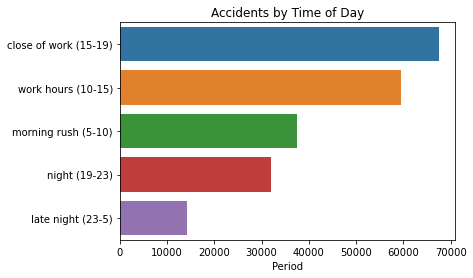

In [23]:
#check accident counts per time period

print(merged.Period.value_counts(normalize=True))

#visualize accident counts by time period

per = merged.Period.value_counts()

sns.barplot(y=per.index, x=per)
plt.title('Accidents by Time of Day')
plt.show()

32% of accidents happen between 3pm and 7pm when people close from work.

In [24]:
variables['Urban Rural']

,code,label
0,1,Urban
1,2,Rural
2,3,Unallocated


In [25]:
#create a dictionary of the variables
urban_rural = variables['Urban Rural'].set_index('code').to_dict()['label']

In [26]:
#accidents by urban or rural area and by time period
merged[merged.Period=='close of work (15-19)']['Urban_or_Rural_Area'].map(urban_rural).value_counts(normalize=True).index

Index(['Urban', 'Rural', 'Unallocated'], dtype='object')

Naturally urban areas record a high number of accidents after close of work. In this dataset it's 64%.

In [27]:
[x for x in variables.keys() if 'district' in x.lower()]

['Local Authority (District)']

In [28]:
#create dictionary of districts
local_district = variables['Local Authority (District)'].set_index('code').to_dict()['label']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 Accident Districts')

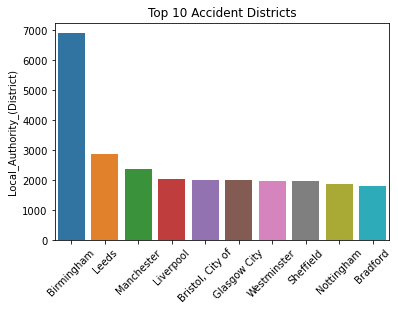

In [29]:
#plot top 10 districts for accident counts
ur = merged[merged.Urban_or_Rural_Area==1]['Local_Authority_(District)'].map(local_district).value_counts()[:10]

sns.barplot(ur.index, ur)
plt.xticks(rotation=45)
plt.title('Top 10 Accident Districts')

In [30]:
ur

Birmingham          6913
Leeds               2872
Manchester          2359
Liverpool           2050
Bristol, City of    1994
Glasgow City        1986
Westminster         1978
Sheffield           1961
Nottingham          1869
Bradford            1808
Name: Local_Authority_(District), dtype: int64

In [31]:
top_10_urban=merged[merged.Urban_or_Rural_Area==1]['Local_Authority_(District)'].value_counts()[:10].index

Text(0, 0.5, 'Percentage')

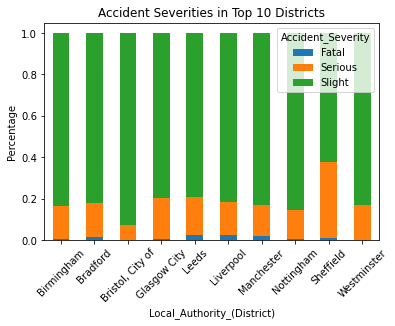

In [32]:
#accident severities in top 10 urban districts
pd.crosstab(merged[(merged.Urban_or_Rural_Area==1) & (merged['Local_Authority_(District)'].isin(top_10_urban))]['Local_Authority_(District)'].map(local_district), merged.Accident_Severity.map({1:'Fatal',2:'Serious',3:'Slight'}),normalize='index').plot.bar(stacked=True, figsize=(6,4),rot=45)
plt.title('Accident Severities in Top 10 Districts')
plt.ylabel('Percentage')

### (b)	For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?

In [33]:
[x for x in variables.keys() if 'vehicle' in x.lower()]

['Vehicle Type',
 'Vehicle Manoeuvre',
 'Vehicle Location',
 'Was Vehicle Left Hand Drive',
 'Vehicle Propulsion Code']

In [34]:
variables['Vehicle Type']

,code,label
0,1,Pedal cycle
1,2,Motorcycle 50cc and under
2,3,Motorcycle 125cc and under
3,4,Motorcycle over 125cc and up to 500cc
4,5,Motorcycle over 500cc
5,8,Taxi/Private hire car
6,9,Car
7,10,Minibus (8 - 16 passenger seats)
8,11,Bus or coach (17 or more pass seats)
9,16,Ridden horse


In [35]:
#motorbike codes
motorbikes = [2,3,4,5,23,97]

#motorbike accident counts by time of day
merged[merged.Vehicle_Type.isin(motorbikes)].Period.value_counts(normalize=True)


close of work (15-19)    0.345431
work hours (10-15)       0.277803
night (19-23)            0.174857
morning rush (5-10)      0.155546
late night (23-5)        0.046363
Name: Period, dtype: float64

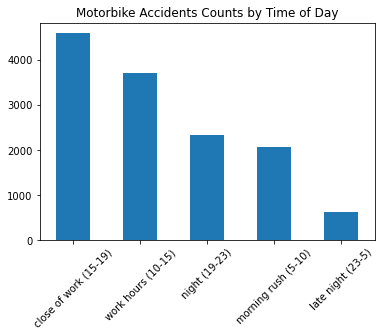

In [36]:
#visualize motorbike accident counts

merged[merged.Vehicle_Type.isin(motorbikes)].Period.value_counts().plot.bar(rot=45)
plt.title('Motorbike Accidents Counts by Time of Day')
plt.show()

34% of motorbike accidents happen around close of work.

In [37]:
#motorbike accidents by urban or rural area
merged[merged.Vehicle_Type.isin(motorbikes)]['Urban_or_Rural_Area'].map(urban_rural).value_counts(normalize=True)

Urban          0.690712
Rural          0.308536
Unallocated    0.000751
Name: Urban_or_Rural_Area, dtype: float64

Text(0.5, 1.0, 'Motorbike Accidents by Location Type')

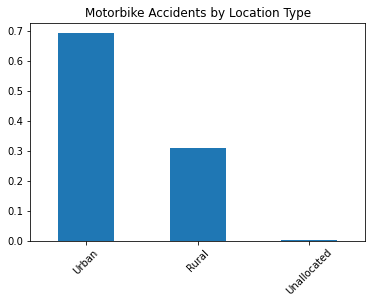

In [38]:
#motorbike accidents by urban or rural area
merged[merged.Vehicle_Type.isin(motorbikes)]['Urban_or_Rural_Area'].map(urban_rural).value_counts(normalize=True).plot.bar(rot=45)
plt.title('Motorbike Accidents by Location Type')

69% of motorbike accidents happen in urban areas

In [39]:
#motorbike accidents by day of week
merged[merged.Vehicle_Type.isin(motorbikes)]['Day_of_Week'].map(day_of_week).value_counts(normalize=True)

Friday       0.160730
Wednesday    0.147656
Thursday     0.147656
Saturday     0.140742
Tuesday      0.139089
Sunday       0.136384
Monday       0.127743
Name: Day_of_Week, dtype: float64

16% of motorbike accidents happen on Friday's

### (c)	For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [40]:
[x for x in variables.keys() if 'casualty' in x.lower()]

['Casualty Class',
 'Sex of Casualty',
 'Age of Casualty',
 'Casualty Severity',
 'Casualty Type']

In [41]:
variables['Casualty Class']

,code,label
0,1,Driver or rider
1,2,Passenger
2,3,Pedestrian


In [42]:
#Let's check pedestrian casualties. Casualty_Class==3. 
merged[merged.Casualty_Class==3].Period.value_counts(normalize=True)

close of work (15-19)    0.354560
work hours (10-15)       0.257793
morning rush (5-10)      0.170140
night (19-23)            0.146398
late night (23-5)        0.071109
Name: Period, dtype: float64

In [43]:
merged[merged.Casualty_Class==3].Period.value_counts(normalize=True)

close of work (15-19)    0.354560
work hours (10-15)       0.257793
morning rush (5-10)      0.170140
night (19-23)            0.146398
late night (23-5)        0.071109
Name: Period, dtype: float64

Text(0.5, 1.0, 'Accidents Involving Pedestrians by Time of Day')

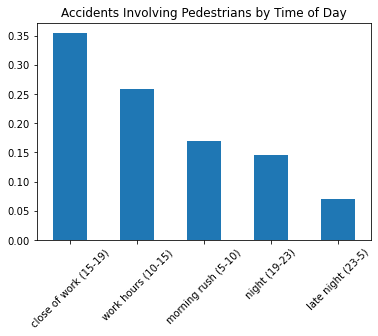

In [44]:
#visualize
merged[merged.Casualty_Class==3].Period.value_counts(normalize=True).plot.bar(rot=45)

plt.title('Accidents Involving Pedestrians by Time of Day')

35% of accidents where casualties included pedestrians happen within closing hours (3pm to 7pm). 

This forms the largest casualty period

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

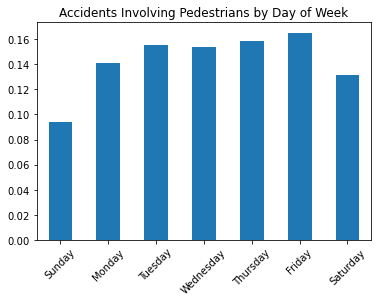

In [45]:
#plot pedestrian accidents
fig, ax = plt.subplots(1,1)

merged[merged.Casualty_Class==3].Day_of_Week.value_counts(normalize=True).sort_index().plot.bar(ax=ax)

plt.title('Accidents Involving Pedestrians by Day of Week')

ax.set_xticklabels(day_of_week.values())

plt.xticks(rotation=45)

For accidents involving pedestrians, Sunday has the lowest counts relative to other days. However accident counts are quite similar during weekdays.

### (d)	What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?

In [46]:
#In 2019 daylight savings in the UK was March 31 to Oct 27
merged[(merged.Date>='31-Mar-2019') & (merged.Date<='06-Apr-2019')].Date.value_counts().sort_index()

2019-03-31    471
2019-04-01    398
2019-04-02    612
2019-04-03    550
2019-04-04    642
2019-04-05    604
2019-04-06    672
Name: Date, dtype: int64

Text(0.5, 1.0, 'Daylight Savings Start')

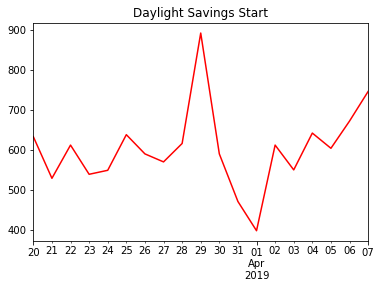

In [47]:
merged[(merged.Date>='20-Mar-2019') & (merged.Date<='07-Apr-2019')].Date.value_counts().sort_index().plot(color='red')
plt.title('Daylight Savings Start')

2 days to the start of daylight savings accident counts spiked. The day after daylight savings started, there was a 21% dip in accident counts.

In [48]:
merged[(merged.Date>='27-Oct-2019') & (merged.Date<='02-Nov-2019')].Date.value_counts().sort_index()

2019-10-27    452
2019-10-28    498
2019-10-29    556
2019-10-30    516
2019-10-31    435
2019-11-01    713
2019-11-02    560
Name: Date, dtype: int64

Text(0.5, 1.0, 'Daylight Savings Start')

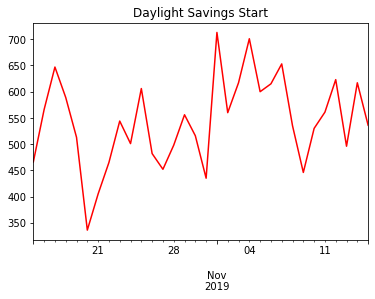

In [49]:
merged[(merged.Date>='15-Oct-2019') & (merged.Date<='15-Nov-2019')].Date.value_counts().sort_index().plot(color='red')
plt.title('Daylight Savings Start')

There doesn't appear to be a significant effect after daylight savings ended.

### (e)	What impact, if any, does sunrise and sunset times have on road traffic accidents?

In [50]:
#Let's use sunrise as 6am and sunset as 8pm

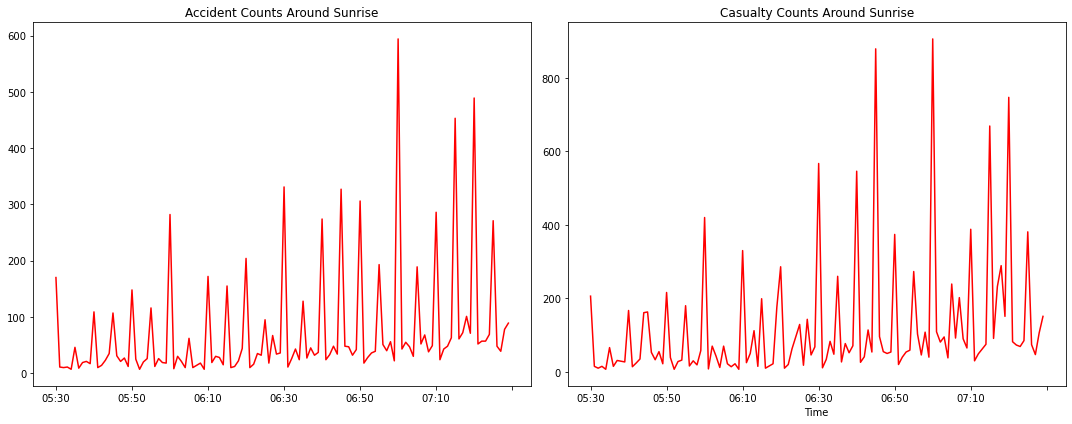

In [51]:
#accidents around sunrise

figure, axes = plt.subplots(1,2, figsize=(15,6))
axes[0] = merged[(merged.Time>='05:30') & (merged.Time<'07:30')].Time.value_counts().sort_index().plot(ax=axes[0], color='red')
axes[0].set_title('Accident Counts Around Sunrise')

#trend of casualty counts around sunrise
axes[1] = merged[(merged.Time>='05:30') & (merged.Time<'07:30')].groupby('Time').Number_of_Casualties.sum().plot(ax=axes[1], color='red')
axes[1].set_title('Casualty Counts Around Sunrise')
plt.tight_layout()

accident levels start increasing slightly after sunrise

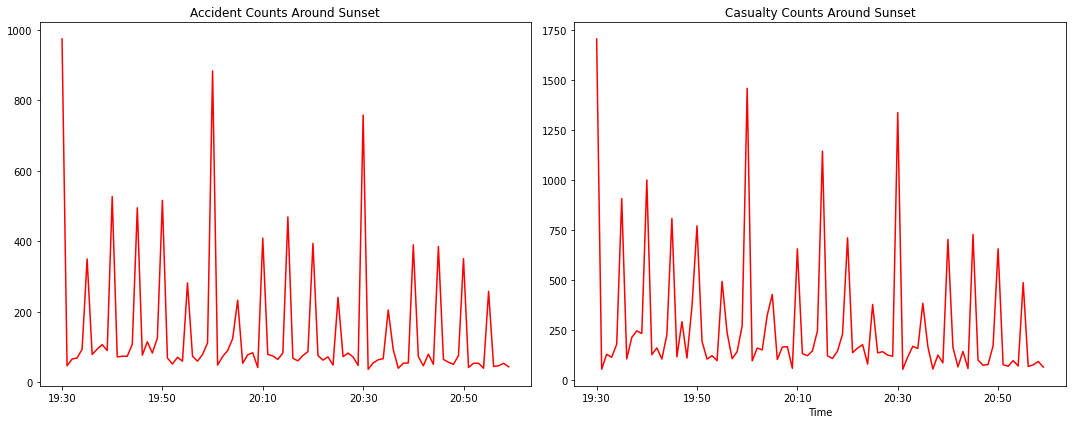

In [52]:
figure, axes = plt.subplots(1,2,figsize=(15,6))

# accident counts around sunset
axes[0] = merged[(merged.Time>='19:30') & (merged.Time<'21:00')].Time.value_counts().sort_index().plot(ax=axes[0], color='red')
axes[0].set_title('Accident Counts Around Sunset')

#trend of casualty counts around sunset
axes[1] = merged[(merged.Time>='19:30') & (merged.Time<'21:00')].groupby('Time').Number_of_Casualties.sum().plot(ax=axes[1], color='red')
axes[1].set_title('Casualty Counts Around Sunset')

plt.tight_layout() #prevent overlapping plots
plt.show()

Accidents reduced marginally after sunset

### (f)	Are there particular types of vehicles (engine capacity, age of vehicle, etc.) that are more frequently involved in road traffic accidents?

In [49]:
merged['Engine_Capacity_(CC)'].value_counts()

-1       50113
 1598    12805
 1968     7341
 1995     6429
 998      6184
         ...  
 4012        1
 2068        1
 3564        1
 1645        1
 8870        1
Name: Engine_Capacity_(CC), Length: 963, dtype: int64

Text(0.5, 1.0, 'Engine capacity')

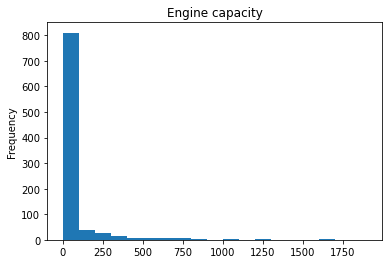

In [48]:
merged['Engine_Capacity_(CC)'].value_counts().plot.hist(bins=list(range(0,2000,100)))
plt.title('Engine capacity')

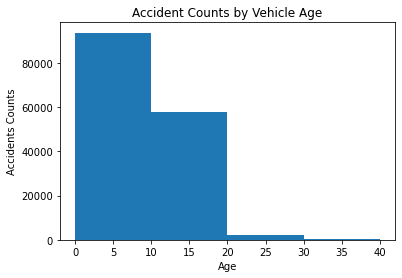

In [55]:
#vehicle age
plt.hist(merged.Age_of_Vehicle,bins=list(range(0,50,10)))
plt.xlabel('Age')
plt.ylabel('Accidents Counts')
plt.title('Accident Counts by Vehicle Age')
plt.show()

In [56]:
for i in list(range(0,50,10)):
    print(f'Age < {i}: {round(merged[merged.Age_of_Vehicle<i].shape[0]/merged.shape[0],2)}%')

Age < 0: 0.27%
Age < 10: 0.71%
Age < 20: 0.99%
Age < 30: 1.0%
Age < 40: 1.0%


99% of vehicles are younger than 20 years

In [57]:
vehicle_type = variables['Vehicle Type'].set_index('code')['label']

In [58]:
merged.Vehicle_Type.map(vehicle_type).value_counts(normalize=True)

Car                                      0.741960
Pedal cycle                              0.063305
Van / Goods 3.5 tonnes mgw or under      0.055902
Motorcycle 125cc and under               0.027471
Taxi/Private hire car                    0.021778
Motorcycle over 500cc                    0.020790
Bus or coach (17 or more pass seats)     0.019326
Goods 7.5 tonnes mgw and over            0.015501
Motorcycle over 125cc and up to 500cc    0.007912
Motorcycle 50cc and under                0.005256
Other vehicle                            0.004814
Goods over 3.5t. and under 7.5t          0.004158
Goods vehicle - unknown weight           0.003664
Minibus (8 - 16 passenger seats)         0.002295
Agricultural vehicle                     0.001986
Motorcycle - unknown cc                  0.001601
Mobility scooter                         0.000912
Data missing or out of range             0.000741
Ridden horse                             0.000271
Electric motorcycle                      0.000209


In [59]:
pd.DataFrame(merged.Vehicle_Type.map(vehicle_type).value_counts(normalize=True)).reset_index()

,index,Vehicle_Type
0,Car,0.741960
1,Pedal cycle,0.063305
2,Van / Goods 3.5 tonnes mgw or under,0.055902
3,Motorcycle 125cc and under,0.027471
4,Taxi/Private hire car,0.021778
5,Motorcycle over 500cc,0.020790
6,Bus or coach (17 or more pass seats),0.019326
7,Goods 7.5 tonnes mgw and over,0.015501
8,Motorcycle over 125cc and up to 500cc,0.007912
9,Motorcycle 50cc and under,0.005256


Text(0, 0.5, '')

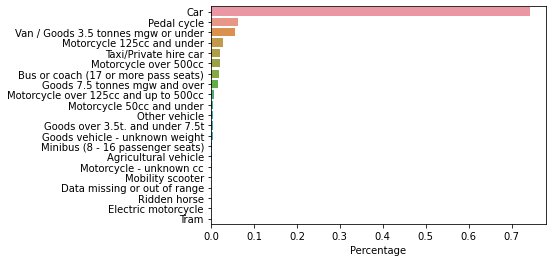

In [60]:
sns.barplot(x='Vehicle_Type',y='index',data=pd.DataFrame(merged.Vehicle_Type.map(vehicle_type).value_counts(normalize=True)).reset_index())
plt.xlabel('Percentage')
plt.ylabel('')

74% of road accidents happen with cars

### (g)	Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?

In [51]:
[x for x in variables if 'condition' in x.lower()]

['Light Conditions', 'Special Conditions at Site']

In [52]:
#light conditions dictionary
light_conditions = variables['Light Conditions'].set_index('code')['label'].to_dict()
light_conditions

{1: 'Daylight',
 4: 'Darkness - lights lit',
 5: 'Darkness - lights unlit',
 6: 'Darkness - no lighting',
 7: 'Darkness - lighting unknown',
 -1: 'Data missing or out of range'}

In [53]:
merged.Light_Conditions.map(light_conditions).value_counts()

Daylight                        152128
Darkness - lights lit            42067
Darkness - no lighting           10994
Darkness - lighting unknown       3899
Darkness - lights unlit           1351
Data missing or out of range         1
Name: Light_Conditions, dtype: int64

In [54]:
merged.Light_Conditions.map(light_conditions).value_counts(normalize=True)

Daylight                        0.722904
Darkness - lights lit           0.199900
Darkness - no lighting          0.052243
Darkness - lighting unknown     0.018528
Darkness - lights unlit         0.006420
Data missing or out of range    0.000005
Name: Light_Conditions, dtype: float64

Text(0.5, 1.0, 'Lighting Conditions')

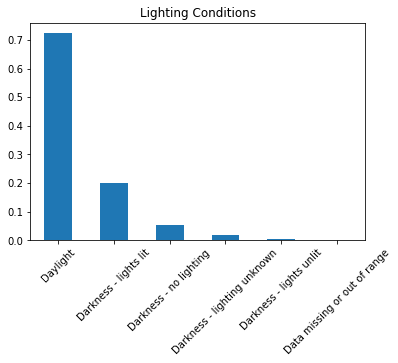

In [55]:
#visualize lighting conditions
merged.Light_Conditions.map(light_conditions).value_counts(normalize=True).plot.bar(rot=45)

plt.title('Lighting Conditions')

72% of accidents happen in daylight conditions

In [58]:
[x for x in variables if 'weather' in x.lower()]

['Weather']

In [59]:
weather_conditions = variables['Weather'].set_index('code')['label'].to_dict()
weather_conditions

{1: 'Fine no high winds',
 2: 'Raining no high winds',
 3: 'Snowing no high winds',
 4: 'Fine + high winds',
 5: 'Raining + high winds',
 6: 'Snowing + high winds',
 7: 'Fog or mist',
 8: 'Other',
 9: 'Unknown',
 -1: 'Data missing or out of range'}

In [60]:
merged.Weather_Conditions.map(weather_conditions).value_counts()

Fine no high winds       168975
Raining no high winds     25869
Unknown                    4785
Other                      4763
Fine + high winds          2361
Raining + high winds       2338
Fog or mist                 637
Snowing no high winds       627
Snowing + high winds         85
Name: Weather_Conditions, dtype: int64

In [61]:
merged.Weather_Conditions.map(weather_conditions).value_counts(normalize=True)

Fine no high winds       0.802960
Raining no high winds    0.122928
Unknown                  0.022738
Other                    0.022634
Fine + high winds        0.011219
Raining + high winds     0.011110
Fog or mist              0.003027
Snowing no high winds    0.002979
Snowing + high winds     0.000404
Name: Weather_Conditions, dtype: float64

Text(0.5, 1.0, 'Weather Conditions')

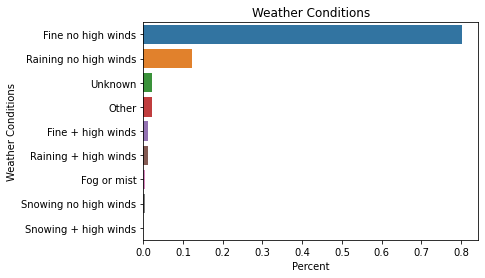

In [62]:
weather = pd.DataFrame(merged.Weather_Conditions.map(weather_conditions).value_counts(normalize=True)).reset_index().rename(columns={'index':'Weather Conditions', 'Weather_Conditions':'Percent'})

sns.barplot(y='Weather Conditions',x='Percent',data=weather)

plt.title('Weather Conditions')

80% of accidents happen in fine weather with no high winds. 

Since most accidents happened in good conditions, perhaps there are driver related issues?

In [63]:
#manoeuvre dict
manoeuvre=variables['Vehicle Manoeuvre'].set_index('code')['label'].to_dict()
manoeuvre

{1: 'Reversing',
 2: 'Parked',
 3: 'Waiting to go - held up',
 4: 'Slowing or stopping',
 5: 'Moving off',
 6: 'U-turn',
 7: 'Turning left',
 8: 'Waiting to turn left',
 9: 'Turning right',
 10: 'Waiting to turn right',
 11: 'Changing lane to left',
 12: 'Changing lane to right',
 13: 'Overtaking moving vehicle - offside',
 14: 'Overtaking static vehicle - offside',
 15: 'Overtaking - nearside',
 16: 'Going ahead left-hand bend',
 17: 'Going ahead right-hand bend',
 18: 'Going ahead other',
 -1: 'Data missing or out of range'}

In [72]:
#vehicle manoeuvres in good weather
merged[merged.Weather_Conditions==1].Vehicle_Manoeuvre.map(manoeuvre).value_counts(normalize=True)

Going ahead other                      0.489836
Turning right                          0.089558
Slowing or stopping                    0.068105
Waiting to go - held up                0.056831
Moving off                             0.041953
Parked                                 0.039923
Data missing or out of range           0.039775
Going ahead right-hand bend            0.030265
Turning left                           0.028673
Going ahead left-hand bend             0.027513
Overtaking moving vehicle - offside    0.017985
Waiting to turn right                  0.014150
Reversing                              0.012049
Overtaking static vehicle - offside    0.008936
Changing lane to right                 0.008605
Changing lane to left                  0.007427
U-turn                                 0.007113
Overtaking - nearside                  0.006427
Waiting to turn left                   0.004876
Name: Vehicle_Manoeuvre, dtype: float64

Text(0, 0.5, '')

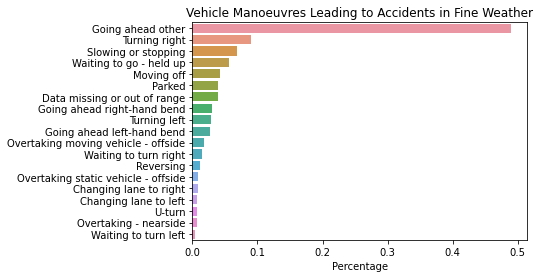

In [73]:
good_weather_maneouvre = pd.DataFrame(merged[merged.Weather_Conditions==1].Vehicle_Manoeuvre.map(manoeuvre).value_counts(normalize=True)).reset_index().rename(columns={'index':'Vehicle_Manoeuvre','Vehicle_Manoeuvre':'Percentage'})

sns.barplot(y='Vehicle_Manoeuvre',x='Percentage',data=good_weather_maneouvre)
plt.title('Vehicle Manoeuvres Leading to Accidents in Fine Weather')
plt.ylabel('')

49% of accidents in fine weather conditions are caused by overtaking

In [65]:
#road surface conditions
merged.Road_Surface_Conditions.value_counts()

 1    149354
 2     56539
 4      2040
-1      1793
 3       411
 5       303
Name: Road_Surface_Conditions, dtype: int64

In [66]:
[x for x in variables if 'surface' in x.lower()]

['Road Surface']

In [67]:
#road surface conditions dictionary
road_surface = variables['Road Surface'].set_index('code')['label'].to_dict()
road_surface

{1: 'Dry',
 2: 'Wet or damp',
 3: 'Snow',
 4: 'Frost or ice',
 5: 'Flood over 3cm. deep',
 6: 'Oil or diesel',
 7: 'Mud',
 -1: 'Data missing or out of range'}

In [68]:
#accidents with special conditions at site
merged.Road_Surface_Conditions.map(road_surface).value_counts()

Dry                             149354
Wet or damp                      56539
Frost or ice                      2040
Data missing or out of range      1793
Snow                               411
Flood over 3cm. deep               303
Name: Road_Surface_Conditions, dtype: int64

In [69]:
merged.Road_Surface_Conditions.map(road_surface).value_counts(normalize=True)

Dry                             0.709722
Wet or damp                     0.268670
Frost or ice                    0.009694
Data missing or out of range    0.008520
Snow                            0.001953
Flood over 3cm. deep            0.001440
Name: Road_Surface_Conditions, dtype: float64

Text(0.5, 1.0, 'Road Surface Conditions')

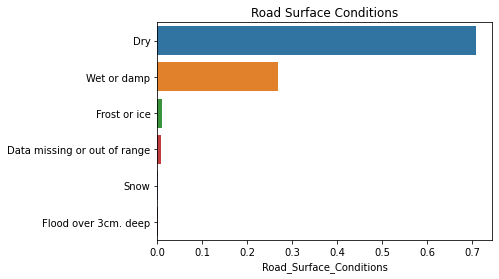

In [70]:
#visualize road surface conditions
rs = merged.Road_Surface_Conditions.map(road_surface).value_counts(normalize=True)

sns.barplot(y=rs.index, x=rs)

plt.title('Road Surface Conditions')

71% of accidents happened on dry road surfaces

In [71]:
# manoeuvres on dry road surfaces

Text(0, 0.5, '')

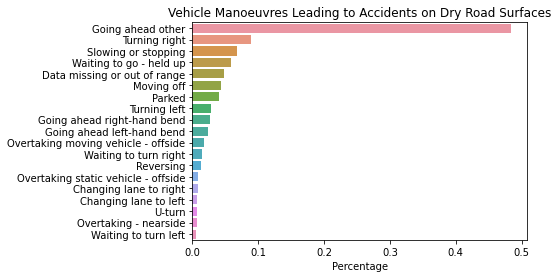

In [72]:
good_road_surface_maneouvre = pd.DataFrame(merged[merged.Road_Surface_Conditions==1].Vehicle_Manoeuvre.map(manoeuvre).value_counts(normalize=True)).reset_index().rename(columns={'index':'Vehicle_Manoeuvre','Vehicle_Manoeuvre':'Percentage'})

sns.barplot(y='Vehicle_Manoeuvre',x='Percentage',data=good_road_surface_maneouvre)
plt.title('Vehicle Manoeuvres Leading to Accidents on Dry Road Surfaces')
plt.ylabel('')

49% of accidents happening in dry road surface conditions happened during overtaking

In [73]:
[x for x in variables if 'special' in x.lower()]

['Special Conditions at Site']

In [74]:
#special conditions dictionary
special_conditions_at_site = variables['Special Conditions at Site'].set_index('code')['label'].to_dict()
special_conditions_at_site

{0: 'None',
 1: 'Auto traffic signal - out',
 2: 'Auto signal part defective',
 3: 'Road sign or marking defective or obscured',
 4: 'Roadworks',
 5: 'Road surface defective',
 6: 'Oil or diesel',
 7: 'Mud',
 -1: 'Data missing or out of range'}

In [75]:
#special conditions at site
merged.Special_Conditions_at_Site.map(special_conditions_at_site).value_counts()

None                                          203557
Roadworks                                       2548
Data missing or out of range                    2272
Auto traffic signal - out                        559
Mud                                              451
Road sign or marking defective or obscured       387
Oil or diesel                                    327
Road surface defective                           269
Auto signal part defective                        70
Name: Special_Conditions_at_Site, dtype: int64

In [85]:
merged.Special_Conditions_at_Site.map(special_conditions_at_site).value_counts(normalize=True)

None                                          0.967292
Roadworks                                     0.012108
Data missing or out of range                  0.010796
Auto traffic signal - out                     0.002656
Mud                                           0.002143
Road sign or marking defective or obscured    0.001839
Oil or diesel                                 0.001554
Road surface defective                        0.001278
Auto signal part defective                    0.000333
Name: Special_Conditions_at_Site, dtype: float64

<AxesSubplot:>

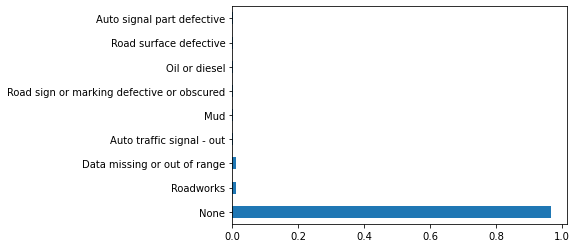

In [86]:
merged.Special_Conditions_at_Site.map(special_conditions_at_site).value_counts(normalize=True).plot.barh()

In 96% of accidents, there were no special conditions at site. 1.2% had road works at other conditions make up the rest of accident counts

In [96]:
#Junction Location

In [87]:
[x for x in variables if 'situation' in x.lower()]

[]

In [94]:
junction_location = variables['Junction Location'].set_index('code')['label'].to_dict()
junction_location

{0: 'Not at or within 20 metres of junction',
 1: 'Approaching junction or waiting/parked at junction approach',
 2: 'Cleared junction or waiting/parked at junction exit',
 3: 'Leaving roundabout',
 4: 'Entering roundabout',
 5: 'Leaving main road',
 6: 'Entering main road',
 7: 'Entering from slip road',
 8: 'Mid Junction - on roundabout or on main road',
 -1: 'Data missing or out of range'}

In [95]:
#check counts of accidents at junction location
merged.Junction_Location.map(junction_location).value_counts()


Not at or within 20 metres of junction                         87129
Approaching junction or waiting/parked at junction approach    46702
Mid Junction - on roundabout or on main road                   35835
Cleared junction or waiting/parked at junction exit            11581
Entering main road                                              9133
Data missing or out of range                                    6664
Entering roundabout                                             5204
Leaving main road                                               4716
Leaving roundabout                                              2749
Entering from slip road                                          727
Name: Junction_Location, dtype: int64

In [98]:
#check percentages
merged.Junction_Location.map(junction_location).value_counts(normalize=True)

Not at or within 20 metres of junction                         0.414033
Approaching junction or waiting/parked at junction approach    0.221925
Mid Junction - on roundabout or on main road                   0.170286
Cleared junction or waiting/parked at junction exit            0.055032
Entering main road                                             0.043400
Data missing or out of range                                   0.031667
Entering roundabout                                            0.024729
Leaving main road                                              0.022410
Leaving roundabout                                             0.013063
Entering from slip road                                        0.003455
Name: Junction_Location, dtype: float64

Text(0.5, 1.0, 'Accidents around junctions')

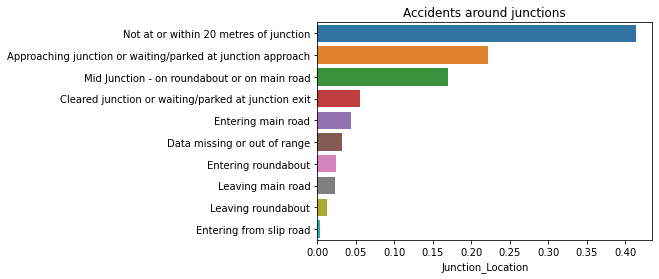

In [100]:
jl = merged.Junction_Location.map(junction_location).value_counts(normalize=True)

sns.barplot(y=jl.index, x=jl)
plt.title('Accidents around junctions')

41% of accidents did not happen within 20 meters of a junction. However, about 39% of accidents happened around a junction or roundabout.

In [102]:
#around what time do accidents happen around junctions
merged[merged.Junction_Location.isin([1,2])].Period.value_counts()

close of work (15-19)    18932
work hours (10-15)       16859
morning rush (5-10)      10004
night (19-23)             8820
late night (23-5)         3668
Name: Period, dtype: int64

<AxesSubplot:>

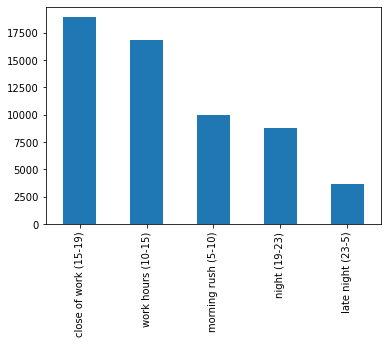

In [103]:
#around what time do accidents happen around junctions
merged[merged.Junction_Location.isin([1,2])].Period.value_counts().plot.bar()

Accidents around junctions happened mostly in the day time.

### (h)	How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?

In [78]:
#let's find driver related columns
[x for x in merged.columns if 'DRIVER' in x.upper()]

['Journey_Purpose_of_Driver',
 'Sex_of_Driver',
 'Age_of_Driver',
 'Age_Band_of_Driver',
 'Driver_IMD_Decile',
 'Driver_Home_Area_Type']

#### Purpose of Journey

In [79]:
#create mappings
driver_purpose = {
1:'Journey as part of work',
2:'Commuting to/from work',
3:'Taking pupil to/from school',
4:'Pupil riding to/from school',
5:'Other',
6:'Not known',
15:'Other/Not known (2005-10)',
-1:'Data missing or out of range'
}

In [80]:
#check accident counts
print(merged.Journey_Purpose_of_Driver.map(driver_purpose).value_counts(),'\n')

print(merged.Journey_Purpose_of_Driver.map(driver_purpose).value_counts(normalize=True))

Not known                       129816
Journey as part of work          29904
Other                            26207
Commuting to/from work           21515
Taking pupil to/from school       2308
Pupil riding to/from school        660
Data missing or out of range        30
Name: Journey_Purpose_of_Driver, dtype: int64 

Not known                       0.616879
Journey as part of work         0.142102
Other                           0.124534
Commuting to/from work          0.102238
Taking pupil to/from school     0.010967
Pupil riding to/from school     0.003136
Data missing or out of range    0.000143
Name: Journey_Purpose_of_Driver, dtype: float64


<AxesSubplot:>

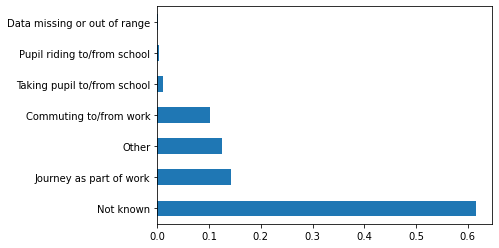

In [81]:
#visualize accident counts by purpose of journey
merged.Journey_Purpose_of_Driver.map(driver_purpose).value_counts(normalize=True).plot.barh()

62% of accidents have no recorded purpose of the journey. The next 14 percent are work related journeys.

#### Sex of Driver

In [82]:
#create mappings
sex_of_driver = {1:'Male',
2:'Female',
3:'Not known',
-1:'Data missing or out of range'
}


In [83]:
#accident counts by sex of driver
print(merged.Sex_of_Driver.map(sex_of_driver).value_counts(),'\n')

print(merged.Sex_of_Driver.map(sex_of_driver).value_counts(normalize=True))

Male         132064
Female        58673
Not known     19703
Name: Sex_of_Driver, dtype: int64 

Male         0.627561
Female       0.278811
Not known    0.093628
Name: Sex_of_Driver, dtype: float64


<AxesSubplot:>

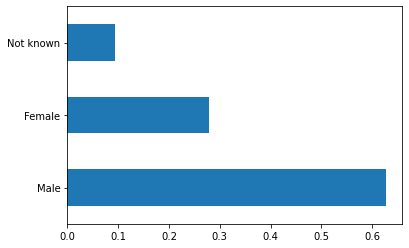

In [84]:
merged.Sex_of_Driver.map(sex_of_driver).value_counts(normalize=True).plot.barh()

62% of accidents involve men

#### Age Band of Driver

In [77]:
age_band = {
    1:'0 - 5',
2:'6 - 10',
3:'11 - 15',
4:'16 - 20',
5:'21 - 25',
6:'26 - 35',
7:'36 - 45',
8:'46 - 55',
9:'56 - 65',
10:'66 - 75',
11:'Over 75',
-1:'Data missing or out of range'

}

In [78]:
# accident counts
merged.Age_Band_of_Driver.map(age_band).value_counts().sort_index()

0 - 5                              36
11 - 15                          1410
16 - 20                         13962
21 - 25                         20824
26 - 35                         46236
36 - 45                         34618
46 - 55                         31525
56 - 65                         20097
6 - 10                            299
66 - 75                          9927
Data missing or out of range    25294
Over 75                          6212
Name: Age_Band_of_Driver, dtype: int64

In [79]:
merged.Age_Band_of_Driver.map(age_band).value_counts(normalize=True).sort_index()

0 - 5                           0.000171
11 - 15                         0.006700
16 - 20                         0.066347
21 - 25                         0.098955
26 - 35                         0.219711
36 - 45                         0.164503
46 - 55                         0.149805
56 - 65                         0.095500
6 - 10                          0.001421
66 - 75                         0.047173
Data missing or out of range    0.120196
Over 75                         0.029519
Name: Age_Band_of_Driver, dtype: float64

Text(0.5, 1.0, 'Age Band of Driver')

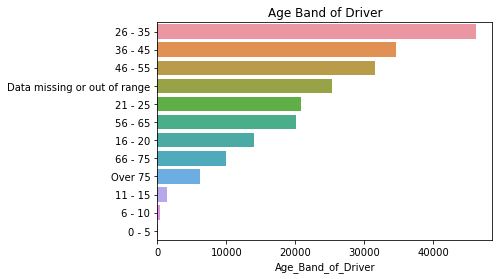

In [81]:
ag = merged.Age_Band_of_Driver.map(age_band).value_counts()
sns.barplot(y=ag.index, x=ag)

plt.title('Age Band of Driver')

22% of accidents have drivers between ages 26 - 35

# Modelling

In this task, we're expected to predict 

* when accidents will occur
* the severity of the injuries sustained 
* where accidents will occur

After this we compare to government models

## Severity Prediction

In [82]:
y = merged.Accident_Severity

In [83]:
#it is good practice to remove features that are too related to the target to prevent data leakage
related_features = ['Accident_Severity','Casualty_Severity','Number_of_Casualties','Date','Casualty_Reference',
 'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty','Age_Band_of_Casualty']


In [84]:
#we will select numeric features
numeric_features = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Number_of_Vehicles', 'Day_of_Week',
       'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', '1st_Point_of_Impact',
       'Was_Vehicle_Left_Hand_Drive?', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_of_Driver', 'Age_Band_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type', 'Vehicle_IMD_Decile',
       'Vehicle_Reference_y', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile']

In [85]:
X = merged[numeric_features]

In [86]:
#fill NaNs
X.fillna(0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


# Feature Engineering

In this stage, we will apply the following

* standardization
* label encoding the periods of the day

In [87]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [88]:
#add the period column to X
X['Period'] = merged['Period']

<ipython-input-88-3bee6d515872>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Period'] = merged['Period']


In [89]:
#one hot encode periods with pd.get_dummies()
periods = pd.get_dummies(X['Period'])

In [90]:
#remove the period column now from training
X.drop('Period', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [91]:
#concatenate period column to training dataset
X = pd.merge(X, periods, left_index=True, right_index=True)

In [92]:
#apply standard scaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

#return column names and indexes
X = pd.DataFrame(X_scaled,index=X.index, columns = X.columns)
X.head(2)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,...,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,close of work (15-19),late night (23-5),morning rush (5-10),night (19-23),work hours (10-15)
0,1.138988,-0.883922,1.11133,-0.703767,-1.037805,-0.233789,-1.087401,-1.237171,-0.692785,1.372932,...,-0.121324,-0.070629,0.171373,-0.011113,-0.689254,1.455827,-0.26843,-0.465069,-0.423663,-0.627034
1,1.138988,-0.883922,1.11133,-0.703767,-1.037805,-0.233789,-1.087401,-1.237171,-0.692785,1.372932,...,-0.121324,-0.070629,0.171373,-0.011113,0.231675,1.455827,-0.26843,-0.465069,-0.423663,-0.627034


## Handle Multicollinearity with Variance Inflaction Factor

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    '''This function calculates VIF for each feature in the dataset'''
    vif = pd.DataFrame()
    vif["FEATURES"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)

In [94]:
%%time
vif= calc_vif(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 3min 57s


In [95]:
#view features with VIF less than 5
vif[vif.VIF<5]

,FEATURES,VIF
5,Number_of_Vehicles,1.569653
6,Day_of_Week,1.003663
8,1st_Road_Class,1.504325
9,1st_Road_Number,1.072766
10,Road_Type,1.228768
11,Speed_limit,2.579272
12,Junction_Detail,2.292916
15,2nd_Road_Number,1.114536
16,Pedestrian_Crossing-Human_Control,1.150528
17,Pedestrian_Crossing-Physical_Facilities,1.204240


In [96]:
features_to_select = vif[vif.VIF<5].FEATURES.values

## Correlation

In [97]:
#top 10 correlated values
pd.merge(X[features_to_select], y, left_index=True, right_index=True).corr()[['Accident_Severity']].sort_values('Accident_Severity',ascending=False)[:11]

,Accident_Severity
Accident_Severity,1.000000
Did_Police_Officer_Attend_Scene_of_Accident,0.154497
Sex_of_Driver,0.085969
Pedestrian_Crossing-Physical_Facilities,0.047154
Junction_Detail,0.045057
1st_Road_Class,0.035708
Junction_Location,0.033877
Weather_Conditions,0.030152
2nd_Road_Number,0.025348
1st_Point_of_Impact,0.016112


In [98]:
final_features = ['Did_Police_Officer_Attend_Scene_of_Accident',
       'Sex_of_Driver', 'Pedestrian_Crossing-Physical_Facilities',
       'Junction_Detail', '1st_Road_Class', 'Junction_Location',
       'Weather_Conditions', '2nd_Road_Number', '1st_Point_of_Impact',
       'Vehicle_Reference_y']

## Train Test Split

In [176]:
#create X and y
y = merged.Accident_Severity
X = merged[final_features]

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report,confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [178]:
#create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

In [179]:
#scale data sets
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled,index=X_train.index, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled,index=X_test.index, columns = X_test.columns)


In [180]:
X_train.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

### Train Models

In [181]:
#create models
LR = LogisticRegression()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)



In [182]:
#train logistic regression
LR.fit(X_train, y_train)
LR_preds = LR.predict(X_test)

print(classification_report(y_test, LR_preds))



              precision    recall  f1-score   support

           1       0.00      0.00      0.00       908
           2       0.00      0.00      0.00      8674
           3       0.77      1.00      0.87     32506

    accuracy                           0.77     42088
   macro avg       0.26      0.33      0.29     42088
weighted avg       0.60      0.77      0.67     42088



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


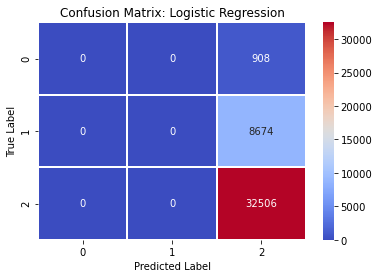

In [189]:
cm = confusion_matrix(y_test, LR_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [184]:
#train decision tree
DC.fit(X_train, y_train)
DC_preds = DC.predict(X_test)

print(classification_report(y_test,DC_preds))



              precision    recall  f1-score   support

           1       0.43      0.12      0.18       908
           2       0.42      0.16      0.23      8674
           3       0.79      0.94      0.86     32506

    accuracy                           0.76     42088
   macro avg       0.55      0.40      0.42     42088
weighted avg       0.71      0.76      0.71     42088



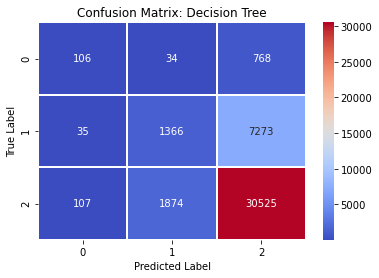

In [185]:
cm = confusion_matrix(y_test, DC_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [186]:
#train random forest
RF.fit(X_train, y_train)
RF_preds = RF.predict(X_test)

print(classification_report(y_test,RF_preds))



              precision    recall  f1-score   support

           1       0.59      0.11      0.18       908
           2       0.54      0.12      0.20      8674
           3       0.79      0.97      0.87     32506

    accuracy                           0.78     42088
   macro avg       0.64      0.40      0.42     42088
weighted avg       0.73      0.78      0.72     42088



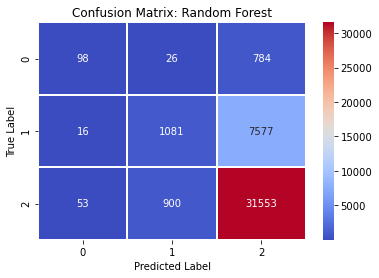

In [187]:
cm = confusion_matrix(y_test, RF_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Text(0.5, 1.0, 'Feature Importances: Random Forest')

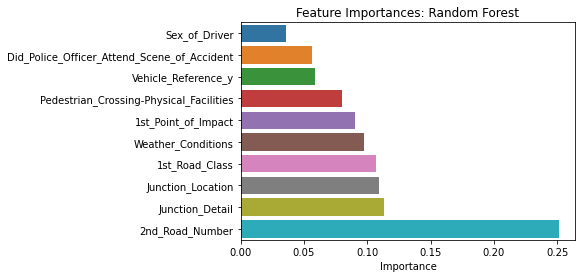

In [188]:
#plot feature importances
rf_importances = pd.DataFrame(RF.feature_importances_, X_test.columns, columns=['Importance']).sort_values('Importance')
sns.barplot(y=rf_importances.index, x=rf_importances.Importance)
plt.title('Feature Importances: Random Forest')

## Compare to Government Models

In [113]:
#load cas data
cas = pd.read_csv('cas_adjustment_lookup_2019.csv')
cas.head(2)

,accident_index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based
0,200401BS00001,1,1,0.23928,0.76072,0
1,200401BS00002,1,1,1.00000,0.00000,0


In [114]:
cas.Injury_Based.value_counts()

0    2944657
1     370080
Name: Injury_Based, dtype: int64

<AxesSubplot:xlabel='Adjusted_Serious', ylabel='Count'>

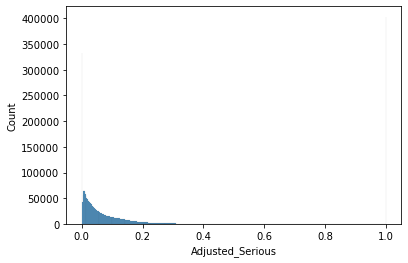

In [160]:
#view data distribution
sns.histplot(cas.Adjusted_Serious)

<AxesSubplot:xlabel='Adjusted_Slight', ylabel='Count'>

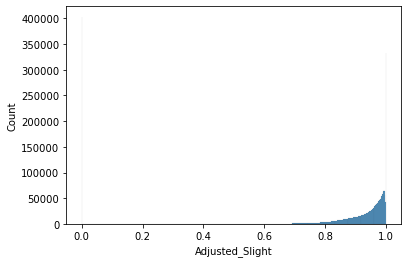

In [161]:
#view data distribution
sns.histplot(cas.Adjusted_Slight)

In [117]:
#get probabilities
comparison_preds = RF.predict_proba(X_test)

In [118]:
#let's use a dataframe for the predictions
c_preds = pd.DataFrame(comparison_preds,index=X_test.index,columns=['Fatal','Serious','Slight'])
c_preds.head()

,Fatal,Serious,Slight
70961,0.000000,0.000000,1.000000
118991,0.065901,0.323006,0.611093
179808,0.010000,0.258972,0.731028
150477,0.053277,0.263851,0.682872
27874,0.000000,0.000000,1.000000


In [119]:
#include accident index which is a unique identifier
df_compare =c_preds.merge(merged['Accident_Index'],left_index=True, right_index=True)
df_compare.head()

,Fatal,Serious,Slight,Accident_Index
70961,0.000000,0.000000,1.000000,2019121901328
118991,0.065901,0.323006,0.611093,2019230844380
179808,0.010000,0.258972,0.731028,2019544504819
150477,0.053277,0.263851,0.682872,2019360928487
27874,0.000000,0.000000,1.000000,2019010193513


In [120]:
#what is in the government model that is in the predictions?
cas[cas.accident_index.isin(df_compare.Accident_Index.unique())]

,accident_index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based
3195921,2019040853504,1,1,0.000000,1.000000,1
3195922,2019040853504,1,2,1.000000,0.000000,1
3195924,2019040853506,1,1,0.000000,1.000000,1
3195925,2019040853506,2,2,0.000000,1.000000,1
3195929,2019040853510,1,2,0.000000,1.000000,1
...,...,...,...,...,...,...
3314724,2019984105519,1,4,1.000000,0.000000,0
3314730,2019984106819,2,1,0.080932,0.919068,0
3314731,2019984106819,2,2,0.080213,0.919787,0
3314732,2019984106919,1,1,0.183336,0.816664,0


In [121]:
#isolate the indexes
cas[cas.accident_index.isin(df_compare.Accident_Index.unique())].index

Int64Index([3195921, 3195922, 3195924, 3195925, 3195929, 3195930, 3195931,
            3195936, 3195937, 3195942,
            ...
            3314706, 3314707, 3314719, 3314722, 3314723, 3314724, 3314730,
            3314731, 3314732, 3314733],
           dtype='int64', length=37548)

In [122]:
#merge government predictions with our predictions
join_comparison = cas.merge(df_compare,left_on='accident_index',right_on='Accident_Index')
join_comparison.head()

,accident_index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based,Fatal,Serious,Slight,Accident_Index
0,2019040853504,1,1,0.0,1.0,1,0.000000,0.192470,0.807530,2019040853504
1,2019040853504,1,2,1.0,0.0,1,0.000000,0.192470,0.807530,2019040853504
2,2019040853506,1,1,0.0,1.0,1,0.022977,0.200017,0.777005,2019040853506
3,2019040853506,2,2,0.0,1.0,1,0.022977,0.200017,0.777005,2019040853506
4,2019040853510,1,2,0.0,1.0,1,0.000000,0.628526,0.371474,2019040853510


In [123]:
#compare serious injuries between government model and predictions
print(classification_report(join_comparison[['Adjusted_Serious']].astype(int),join_comparison[['Serious']].astype(int)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     49813
           1       0.16      0.00      0.01      9601

    accuracy                           0.84     59414
   macro avg       0.50      0.50      0.46     59414
weighted avg       0.73      0.84      0.76     59414



Comparing 'Adjusted Serious' against the government model, we have accuracy of 84%

In [124]:
#compare slight injuries between government model and predictions
print(classification_report(join_comparison[['Adjusted_Slight']].astype(int),join_comparison[['Slight']].astype(int)))

              precision    recall  f1-score   support

           0       0.64      0.93      0.76     37941
           1       0.41      0.09      0.15     21473

    accuracy                           0.63     59414
   macro avg       0.53      0.51      0.45     59414
weighted avg       0.56      0.63      0.54     59414



Comparing 'Adjusted Slight' against the government model, we have accuracy of 63%

# Location Prediction

Here we will predict whether accidents will happen in urban or rural areas

In [190]:
y_location = merged.Urban_or_Rural_Area

X_location = merged[numeric_features].drop('Urban_or_Rural_Area', axis=1)

In [191]:
#fill NaNs
X_location.fillna(0,inplace=True)

## Correlation between variables and location

In [192]:
#choose features to train on without features too related to location
features_to_select_loc = ['Number_of_Vehicles', 'Day_of_Week', '1st_Road_Class',
       '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Vehicle_Reference_y',
       'Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passenger',
       'Bus_or_Coach_Passenger', 'Pedestrian_Road_Maintenance_Worker',
       'Casualty_Type', 'Casualty_Home_Area_Type', 'Casualty_IMD_Decile']

In [193]:
#top 10 correlated values
pd.merge(X_location[features_to_select_loc], y_location, left_index=True, right_index=True).corr()[['Urban_or_Rural_Area']].sort_values('Urban_or_Rural_Area',ascending=False)[:11]

,Urban_or_Rural_Area
Urban_or_Rural_Area,1.000000
Speed_limit,0.681526
Driver_Home_Area_Type,0.244744
Casualty_Home_Area_Type,0.214205
Vehicle_Leaving_Carriageway,0.167972
Casualty_IMD_Decile,0.160394
Vehicle_Manoeuvre,0.151007
Hit_Object_off_Carriageway,0.145159
Skidding_and_Overturning,0.142231
Casualty_Type,0.136625


In [194]:
final_features_loc = ['Speed_limit', 'Driver_Home_Area_Type',
       'Casualty_Home_Area_Type', 'Vehicle_Leaving_Carriageway',
       'Casualty_IMD_Decile', 'Vehicle_Manoeuvre',
       'Hit_Object_off_Carriageway', 'Skidding_and_Overturning',
       'Casualty_Type', 'Was_Vehicle_Left_Hand_Drive?']

### Train and Test Split

In [195]:
#split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_location[final_features_loc],y_location,test_size=0.2, random_state=42,stratify=y_location)

### Apply Scaling on train and test

In [196]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled,index=X_train.index, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled,index=X_test.index, columns = X_test.columns)


In [197]:
X_train.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

### Train Models

In [198]:
#create models
LR = LogisticRegression()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)



In [199]:
#train logistic regression tree
LR.fit(X_train, y_train)
LR_preds = LR.predict(X_test)

print(classification_report(y_test,LR_preds))



              precision    recall  f1-score   support

           1       0.85      0.94      0.89     27217
           2       0.87      0.70      0.77     14855
           3       0.00      0.00      0.00        16

    accuracy                           0.86     42088
   macro avg       0.57      0.55      0.56     42088
weighted avg       0.86      0.86      0.85     42088



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


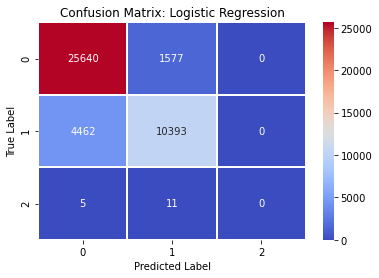

In [200]:
cm = confusion_matrix(y_test, LR_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [201]:
#train decision trees
DC.fit(X_train, y_train)
DC_preds = DC.predict(X_test)

print(classification_report(y_test,DC_preds))



              precision    recall  f1-score   support

           1       0.87      0.92      0.89     27217
           2       0.83      0.74      0.78     14855
           3       0.00      0.00      0.00        16

    accuracy                           0.86     42088
   macro avg       0.57      0.55      0.56     42088
weighted avg       0.85      0.86      0.85     42088



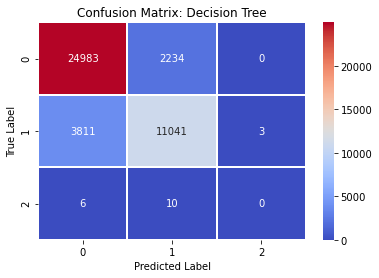

In [202]:
cm = confusion_matrix(y_test, DC_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [203]:
#train random forest
RF.fit(X_train, y_train)
RF_preds = RF.predict(X_test)

print(classification_report(y_test,RF_preds))



              precision    recall  f1-score   support

           1       0.88      0.91      0.90     27217
           2       0.83      0.77      0.80     14855
           3       0.00      0.00      0.00        16

    accuracy                           0.86     42088
   macro avg       0.57      0.56      0.56     42088
weighted avg       0.86      0.86      0.86     42088



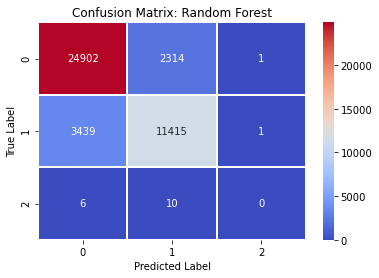

In [204]:
cm = confusion_matrix(y_test, RF_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Text(0.5, 1.0, 'Feature Importances: Random Forest')

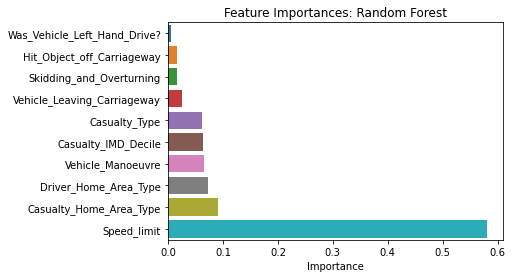

In [205]:
#plot feature importances
rf_importances = pd.DataFrame(RF.feature_importances_, X_test.columns, columns=['Importance']).sort_values('Importance')
sns.barplot(y=rf_importances.index, x=rf_importances.Importance)
plt.title('Feature Importances: Random Forest')

# Predicting Time of Accident

In [207]:
y_time = merged.Period

X_time = merged[numeric_features]

In [208]:
#fill NaNs
X_time.fillna(0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### Correlation between variables and time period

In [209]:
#choose features to train on without features too related to location
features_to_select_time = ['Number_of_Vehicles', 'Day_of_Week', '1st_Road_Class',
       '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Vehicle_Reference_y',
       'Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passenger',
       'Bus_or_Coach_Passenger', 'Pedestrian_Road_Maintenance_Worker',
       'Casualty_Type', 'Casualty_Home_Area_Type', 'Casualty_IMD_Decile']

In [210]:
#temporarily map time periods as numeric so we can do correlations
time_map = {'morning rush (5-10)':1,
          'work hours (10-15)':2, 
    'close of work (15-19)':3, 
       'night (19-23)':4, 
          'late night (23-5)':5
}

In [211]:
#top 10 correlated values
pd.merge(X_time[features_to_select_time], y_time.map(time_map), left_index=True, right_index=True).corr()[['Period']].sort_values('Period',ascending=False)[:11]

,Period
Period,1.000000
Light_Conditions,0.523060
Journey_Purpose_of_Driver,0.142134
Car_Passenger,0.091233
Hit_Object_off_Carriageway,0.063828
Vehicle_Leaving_Carriageway,0.056287
Hit_Object_in_Carriageway,0.052596
Skidding_and_Overturning,0.036126
Age_of_Vehicle,0.035880
Pedestrian_Crossing-Physical_Facilities,0.034597


In [212]:
final_features_time = ['Light_Conditions', 'Journey_Purpose_of_Driver',
       'Car_Passenger', 'Hit_Object_off_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_in_Carriageway',
       'Skidding_and_Overturning', 'Age_of_Vehicle',
       'Pedestrian_Crossing-Physical_Facilities', 'Vehicle_Manoeuvre']

### Train and Test Split

In [213]:
#split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_time[final_features_time],y_time,test_size=0.2, random_state=42,stratify=y_location)

### Scaling

In [214]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled,index=X_train.index, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled,index=X_test.index, columns = X_test.columns)


In [215]:
X_train.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

### Train Models

In [216]:
#create models
LR = LogisticRegression()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)



In [217]:
#train logistic regression tree
LR.fit(X_train, y_train)
LR_preds = LR.predict(X_test)

print(classification_report(y_test,LR_preds))



                       precision    recall  f1-score   support

close of work (15-19)       0.32      0.13      0.18     13597
    late night (23-5)       0.37      0.06      0.11      2859
  morning rush (5-10)       0.37      0.31      0.34      7443
        night (19-23)       0.41      0.38      0.39      6367
   work hours (10-15)       0.41      0.83      0.55     11822

             accuracy                           0.39     42088
            macro avg       0.37      0.34      0.31     42088
         weighted avg       0.37      0.39      0.34     42088



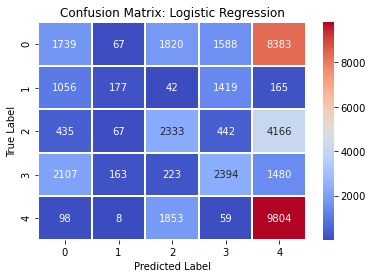

In [224]:
cm = confusion_matrix(y_test, LR_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [219]:
DC.fit(X_train, y_train)
DC_preds = DC.predict(X_test)

print(classification_report(y_test,DC_preds))



                       precision    recall  f1-score   support

close of work (15-19)       0.41      0.32      0.36     13597
    late night (23-5)       0.45      0.34      0.39      2859
  morning rush (5-10)       0.42      0.28      0.33      7443
        night (19-23)       0.47      0.47      0.47      6367
   work hours (10-15)       0.44      0.67      0.53     11822

             accuracy                           0.44     42088
            macro avg       0.44      0.42      0.42     42088
         weighted avg       0.43      0.44      0.42     42088



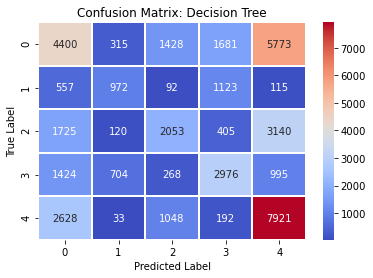

In [220]:
cm = confusion_matrix(y_test, DC_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [221]:
#train random forest
RF.fit(X_train, y_train)
RF_preds = RF.predict(X_test)

print(classification_report(y_test,RF_preds))



                       precision    recall  f1-score   support

close of work (15-19)       0.42      0.30      0.35     13597
    late night (23-5)       0.47      0.34      0.39      2859
  morning rush (5-10)       0.43      0.28      0.34      7443
        night (19-23)       0.47      0.50      0.48      6367
   work hours (10-15)       0.44      0.70      0.54     11822

             accuracy                           0.44     42088
            macro avg       0.45      0.42      0.42     42088
         weighted avg       0.44      0.44      0.42     42088



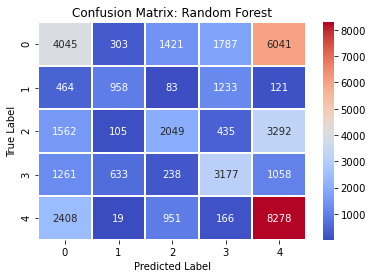

In [222]:
cm = confusion_matrix(y_test, RF_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Text(0.5, 1.0, 'Feature Importances: Random Forest')

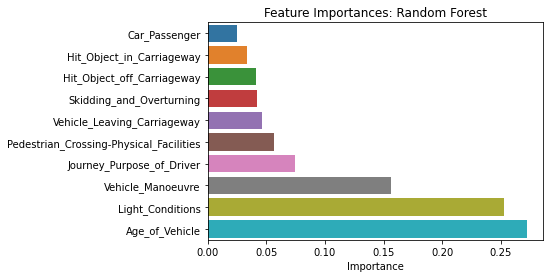

In [223]:
#plot feature importances
rf_importances = pd.DataFrame(RF.feature_importances_, X_test.columns, columns=['Importance']).sort_values('Importance')
sns.barplot(y=rf_importances.index, x=rf_importances.Importance)
plt.title('Feature Importances: Random Forest')